In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [3]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [5]:
duomenys= np.random.randint(1, 10 ,5)

# sukuriam stulpeli su duomenimis

df['A'] = duomenys
print(df)

   A
0  8
1  1
2  6
3  1
4  7


In [7]:
duomenysB= np.random.randint(1, 10 ,5)
df['B'] = duomenysB
print(df)

   A  B
0  8  9
1  1  7
2  6  4
3  1  5
4  7  3


In [8]:
# duomeny apzvalga
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       5 non-null      int32
 1   B       5 non-null      int32
dtypes: int32(2)
memory usage: 172.0 bytes


In [10]:
# apzvalga
# pagal nutylejima grazina 5 virsutinis eilutes
df.head()

,A,B
0,8,9
1,1,7
2,6,4
3,1,5
4,7,3


In [11]:
df.tail(2)

,A,B
3,1,5
4,7,3


In [12]:
cols = df.columns
# cols = list(df.columns)
print(cols)

Index(['A', 'B'], dtype='object')


In [13]:
for i in cols:
    print(i)

A
B


In [54]:
# duomenu nuskaitymas
df14 = pd.read_csv('../../DATA/DUS2014.csv')
df14


,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,nuosavybe,bdu_val,nuts,vv_darb_sk,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,35.03,0,0.58,XL,0,1_49,20-29,0,A,0,...,B,6.00,LT,6,0,0,6.00,0,1,G4
1,2.39,0,0.54,XN,0,1_49,20-29,0,A,0,...,B,6.00,LT,12,0,0,6.00,0,2,G2
2,16.70,0,0.56,XQ,2,GT_250,40-49,0,A,0,...,B,6.00,LT,360,0,0,6.00,0,3,G4
3,28.24,0,0.58,XE,0,1_49,30-39,0,A,0,...,B,6.00,LT,27,0,0,6.00,0,4,G4
4,54.82,0,1.09,XI,0,1_49,40-49,0,A,0,...,B,6.00,LT,11,0,0,11.33,0,5,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44947,15.20,16,100.00,XP,0,1_49,50-59,40,A,0,...,A,18.64,LT,8,0,3000,3393.00,0,44948,G4
44948,17.45,10,100.00,XP,2,GT_250,30-39,40,A,0,...,A,26.37,LT,409,0,1050,3639.67,0,44949,G4
44949,13.73,7,100.00,XP,2,GT_250,50-59,40,A,0,...,A,22.38,LT,778,0,0,3670.00,0,44950,G4
44950,98.09,4,100.00,XP,2,GT_250,30-39,40,B,0,...,A,23.03,LT,380,0,0,4212.00,0,44951,G4


In [18]:
issilavinimas = df14['issilavinimas'] # cia Series objektas - 2 irasai visada
#  1 stulpelis - indeksai, 2 stulpelis - vertes
print(issilavinimas)

0        G4
1        G2
2        G4
3        G4
4        G2
         ..
44947    G4
44948    G4
44949    G4
44950    G4
44951    G4
Name: issilavinimas, Length: 44952, dtype: object


In [19]:

indeksai = issilavinimas.index
print(indeksai)

RangeIndex(start=0, stop=44952, step=1)


In [20]:
vertes = issilavinimas.values
print(vertes)

['G4' 'G2' 'G4' ... 'G4' 'G4' 'G4']


In [21]:
lytis = df14['lytis'].values
print(lytis)

['M' 'F' 'F' ... 'F' 'F' 'F']


In [33]:
df = df14[['lytis', 'issilavinimas', 'amzius', 'bdu_spalio', 'profesija']]
df.head()

,lytis,issilavinimas,amzius,bdu_spalio,profesija
0,M,G4,20-29,6.00,261
1,F,G2,20-29,6.00,334
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
4,M,G2,40-49,11.33,962


In [36]:
df_f = df[(df['lytis'] == 'F') & (df['issilavinimas'] == 'G4')] 
df_f.head()

,lytis,issilavinimas,amzius,bdu_spalio,profesija
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
12,F,G4,30-39,6.00,241
14,F,G4,50-59,17.00,263
34,F,G4,40-49,9.67,121


In [42]:
df_f['bdu_spalio'].max()

np.float64(27242.67)

In [45]:
df.query(expr='lytis == "F" and issilavinimas == "G4"')
df.head()

,lytis,issilavinimas,amzius,bdu_spalio,profesija
0,M,G4,20-29,6.00,261
1,F,G2,20-29,6.00,334
2,F,G4,40-49,6.00,221
3,F,G4,30-39,6.00,332
4,M,G2,40-49,11.33,962


In [46]:
edu = ['G1', 'G2']
for e in edu:
    print(df.query(expr='issilavinimas == @e'))
    

      lytis issilavinimas amzius  bdu_spalio  profesija
8         M            G1  20-29        6.67        912
51        M            G1  20-29      160.33        962
68        F            G1  30-39     1041.00        524
70        M            G1  14-19     1061.00        752
89        M            G1  40-49      418.67        932
...     ...           ...    ...         ...        ...
41133     M            G1  40-49     2978.00        541
41204     M            G1  50-59     1781.00        821
41247     F            G1  30-39     1267.67        322
41478     F            G1  50-59     2135.67        222
41509     F            G1  50-59     2144.00        322

[1716 rows x 5 columns]
      lytis issilavinimas amzius  bdu_spalio  profesija
1         F            G2  20-29        6.00        334
4         M            G2  40-49       11.33        962
5         M            G2  30-39        6.00        122
7         F            G2  20-29       13.33        531
9         M            

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
df['€'] = df['bdu_spalio']/3.4528
df.head()

,lytis,issilavinimas,amzius,bdu_spalio,profesija,€
0,M,G4,20-29,6.00,261,1.737720
1,F,G2,20-29,6.00,334,1.737720
2,F,G4,40-49,6.00,221,1.737720
3,F,G4,30-39,6.00,332,1.737720
4,M,G2,40-49,11.33,962,3.281395


In [73]:
# Išssilavinimo pakopos yra G1,G2,G3 ir G4. Parašykite ciklą,
# kuris išspausdintų pakopos kodą ir spalio atlyginų medianą bei vidurkį,
# atskirai vyrams, atskirai moterims.

# df = df14[['lytis', 'issilavinimas', 'amzius', 'bdu_spalio', 'profesija']]
# df.head()
# df_f = df[(df['lytis'] == 'F') & (df['issilavinimas'] == 'G4')] 
# df_f.head()


# df.head()


# edu = ['G1', 'G2']
# for e in edu:
# print(df.query(expr='issilavinimas == @e'))
df = df14[['issilavinimas', 'bdu_spalio', 'lytis']]
pakopos = ['G1', 'G2', 'G3', 'G4']
lytis = ['F', 'M']

for pak in pakopos:
    for l in lytis:
        df_x = df[(df['lytis'] == l) & (df['issilavinimas'] == pak)]
        print(f"{round(df_x['bdu_spalio'].median(), 2):^10}, {round(df_x['bdu_spalio'].mean(), 2):^10}, {pak}, {l}")

  1256.5  ,  1406.67  , G1, F
 1485.66  ,   1762.3  , G1, M
  1395.0  ,  1571.05  , G2, F
  1884.0  ,  2129.49  , G2, M
  1974.0  ,  2190.46  , G3, F
  2500.0  ,  2900.46  , G3, M
 2691.84  ,  3039.67  , G4, F
  3400.0  ,  4158.56  , G4, M


In [74]:
edu = ['G1','G2', 'G3', 'G4']

for e in edu:
    fv = df.query(expr='issilavinimas == @e and lytis == "F"')['bdu_spalio'].mean() # uzklausa-stulpelis-verte
    fm = df.query(expr='issilavinimas == @e and lytis == "F"')['bdu_spalio'].median()
    print(f'{e:5}|{fv:5.2f}|{fm:5.2f}|{"Mot":5}')

for e in edu:
    fv = df.query(expr='issilavinimas == @e and lytis == "M"')['bdu_spalio'].mean()
    fm = df.query(expr='issilavinimas == @e and lytis == "M"')['bdu_spalio'].median()
    print(f'{e:5}|{fv:5.2f}|{fm:5.2f}|{"Vyr":5}')

G1   |1406.67|1256.50|Mot  
G2   |1571.05|1395.00|Mot  
G3   |2190.46|1974.00|Mot  
G4   |3039.67|2691.84|Mot  
G1   |1762.30|1485.66|Vyr  
G2   |2129.49|1884.00|Vyr  
G3   |2900.46|2500.00|Vyr  
G4   |4158.56|3400.00|Vyr  


M 22586
F 22366


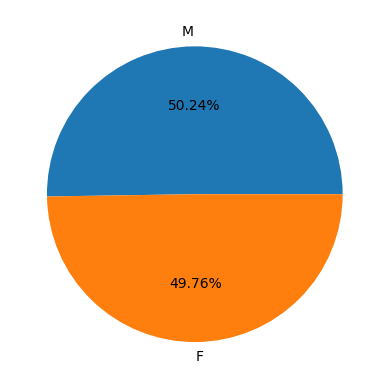

In [78]:
# value_counts()

c = df['lytis'].value_counts()
# print(c)
lytys = c.index
kiekiai = c.values

for li, ci in zip(lytys, kiekiai):
    print(li, ci)
    
plt.pie(x=kiekiai, labels=lytys, autopct='%.2f%%')
plt.show()


In [112]:
df = df14[['issilavinimas', 'bdu_spalio']]
edus = df['issilavinimas'].value_counts().sort_index(ascending=True).index
# edus = df['issilavinimas'].value_counts().sort_index(ascending=True).index.to_list() # padaro i normalu list
print(edus)

for e in edus:
    # d = df.query('issilavinimas == @e')['bdu_spalio'].mean()
    d = df[df['issilavinimas'] == e]['bdu_spalio'].mean()
    print(e, d)

Index(['G1', 'G2', 'G3', 'G4'], dtype='object', name='issilavinimas')
G1 1639.1983275058276
G2 1877.952304728229
G3 2521.961990474626
G4 3494.114123791532


In [95]:
# Parašykite ciklą, kuris surašytų atlyginimų vidurkius bei medianas
# pagal amžiaus grupes (2014 metams, eurais)
# amžiaus grupes gaukite naudodamiesi value_counts()
# tvarkingesniam atvaizdavimui pasinaudokite f-strings
# išvestyje pridėkite dar ir skirtumą tarp vidurkio ir medianos (vidurkis-mediana)

dfa = df14[['amzius', 'bdu_spalio']]
# dfa.head()
amz = dfa['amzius'].value_counts().sort_index(ascending=True).index
print(amz)

for a in amz:
    dv = (dfa.query('amzius == @a')['bdu_spalio'].mean())/ 3.4528
    dm = (dfa.query('amzius == @a')['bdu_spalio'].median())/3.4528
    print(f'{a:5}, {dv:.2f}, {dm:.2f}, {(dv-dm):.2f} ')

Index(['14-19', '20-29', '30-39', '40-49', '50-59', '60+'], dtype='object', name='amzius')
14-19, 361.95, 351.31, 10.64 
20-29, 608.50, 533.77, 74.74 
30-39, 795.91, 651.07, 144.84 
40-49, 700.62, 560.41, 140.20 
50-59, 666.76, 543.09, 123.68 
60+  , 626.85, 512.77, 114.08 


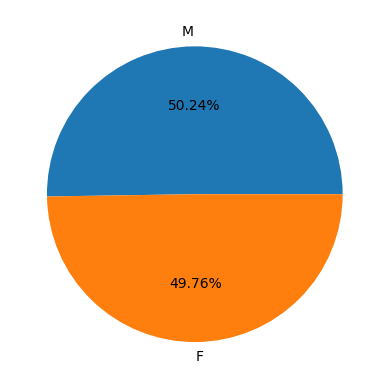

In [97]:
# value_counts() ir pie plot:
# kiek procentų buvo vyrų, moterų 2014 metais?

df = df14[['lytis']]
c = df['lytis'].value_counts()
lytis = c.index
kiekis = c.values

plt.pie(x=kiekis, labels=lytis, autopct='%.2f%%')
plt.show()



amzius
50-59    10968
40-49    10947
30-39     9747
20-29     9015
60+       3928
14-19      347
Name: count, dtype: int64


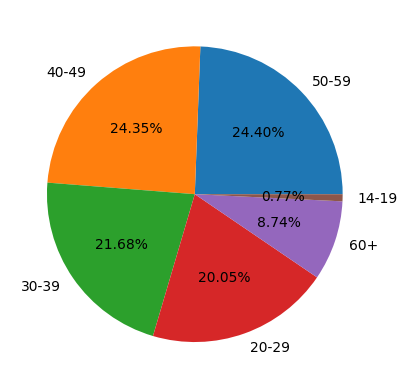

In [100]:
# kiek procentų buvo iš kiekvienos amžiaus grupės?
df = df14[['amzius']]

c = df['amzius'].value_counts()
print(c)
amz = c.index
kiekis = c.values

plt.pie(x=kiekis, labels=amz, autopct='%.2f%%')
plt.show()


issilavinimas
G2    22059
G3    12178
G4     8999
G1     1716
Name: count, dtype: int64


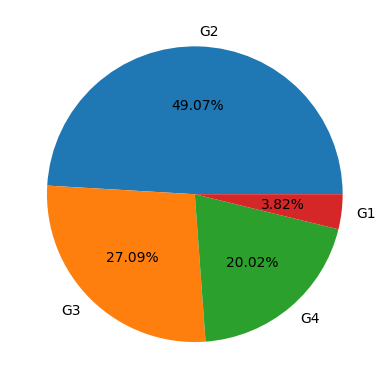

In [101]:
# kiek procentų buvo iš kiekvienos išsilavinimo pakopos?
df = df14[['issilavinimas']]

c = df['issilavinimas'].value_counts()
print(c)
pakopa = c.index
kiekis = c.values

plt.pie(x=kiekis, labels=pakopa, autopct='%.2f%%')
plt.show()



nuosavybe
B    30542
A    14410
Name: count, dtype: int64


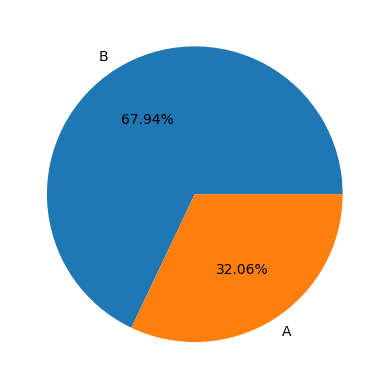

In [102]:
# kiek respondentų buvo iš privataus (B) bei viešojo (A) sektoriaus? (stulpelis: nuosavybe)
df = df14[['nuosavybe']]

c = df['nuosavybe'].value_counts()
print(c)
sektorius = c.index
kiekis = c.values

plt.pie(x=kiekis, labels=sektorius, autopct='%.2f%%')
plt.show()



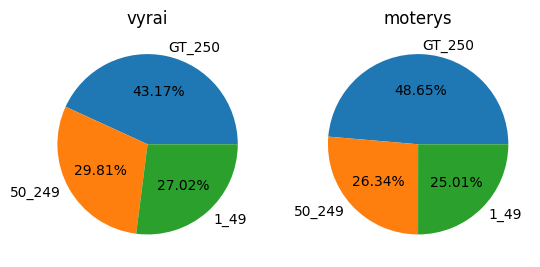

In [110]:
# kiek procentaliai buvo vyrų, moterų iš didelių, vidutinių, mažų įmonių? (Stulpelis im_dydis, 
# du pie plot'ai, vienas vyrams, kitas moterims)

df = df14[['lytis', 'im_dydis']]

cM = df.query('lytis == "M"')['im_dydis'].value_counts()
cF = df.query('lytis == "F"')['im_dydis'].value_counts()

dydisM = cM.index
kiekisM = cM.values

dydisF = cF.index
kiekisF = cF.values

fig, (ax1, ax2)  = plt.subplots(1, 2)

ax1.pie(x=kiekisM, labels=dydisM, autopct='%.2f%%')
ax1.set_title('vyrai')
ax2.pie(x=kiekisF, labels=dydisF, autopct='%.2f%%')
ax2.set_title('moterys')

plt.show()